# Premium Version

In [ ]:
import pandas as pd

# Load the Excel file
file_path = ''
xls = pd.ExcelFile(file_path)

# Check sheet names to get an overview of the data
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [ ]:
xls

In [ ]:
df = xls.parse('Sheet1')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell S4137 is marked as a date but the serial value 44661575 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [ ]:
df.columns

Index(['Case No', 'Claim No', 'Registration Number', 'NHPM Id', 'Family Id',
       'Patient District', 'Gender', 'Age(Years)', 'Category Details',
       'Procedure Details', 'Case Type', 'Case Status', 'Hospital Name',
       'Hospital Code', 'Hospital District', 'IP Registration Date',
       'Admission Date', 'Preauth Date', 'Preauth Amount(Rs.)',
       'Preauth Approve Date', 'Preauth Approved Amount(Rs.)',
       'Preauth Rejected Date', 'Surgery Date', 'Death Date', 'Discharge Date',
       'Claim Submitted Date', 'Actual Claim Submitted Date',
       'Claim Initaiated Amount(Rs.)', 'CPD Approved Amount(Rs.)',
       'Claim Approved Amount(Rs.)', 'Assigned Flag', 'Assigned User',
       'Assigned Group', 'IP Number', 'Actual Registration Date',
       'Claim pending with Medical Auditor', 'Date Created', 'FileName',
       'TDS Amount', 'Final Payment', 'UTR No', 'Claim Paid Date',
       'Gross Payment', 'Diff btw CPD Approved and Gross Paid'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

## Counts of case status

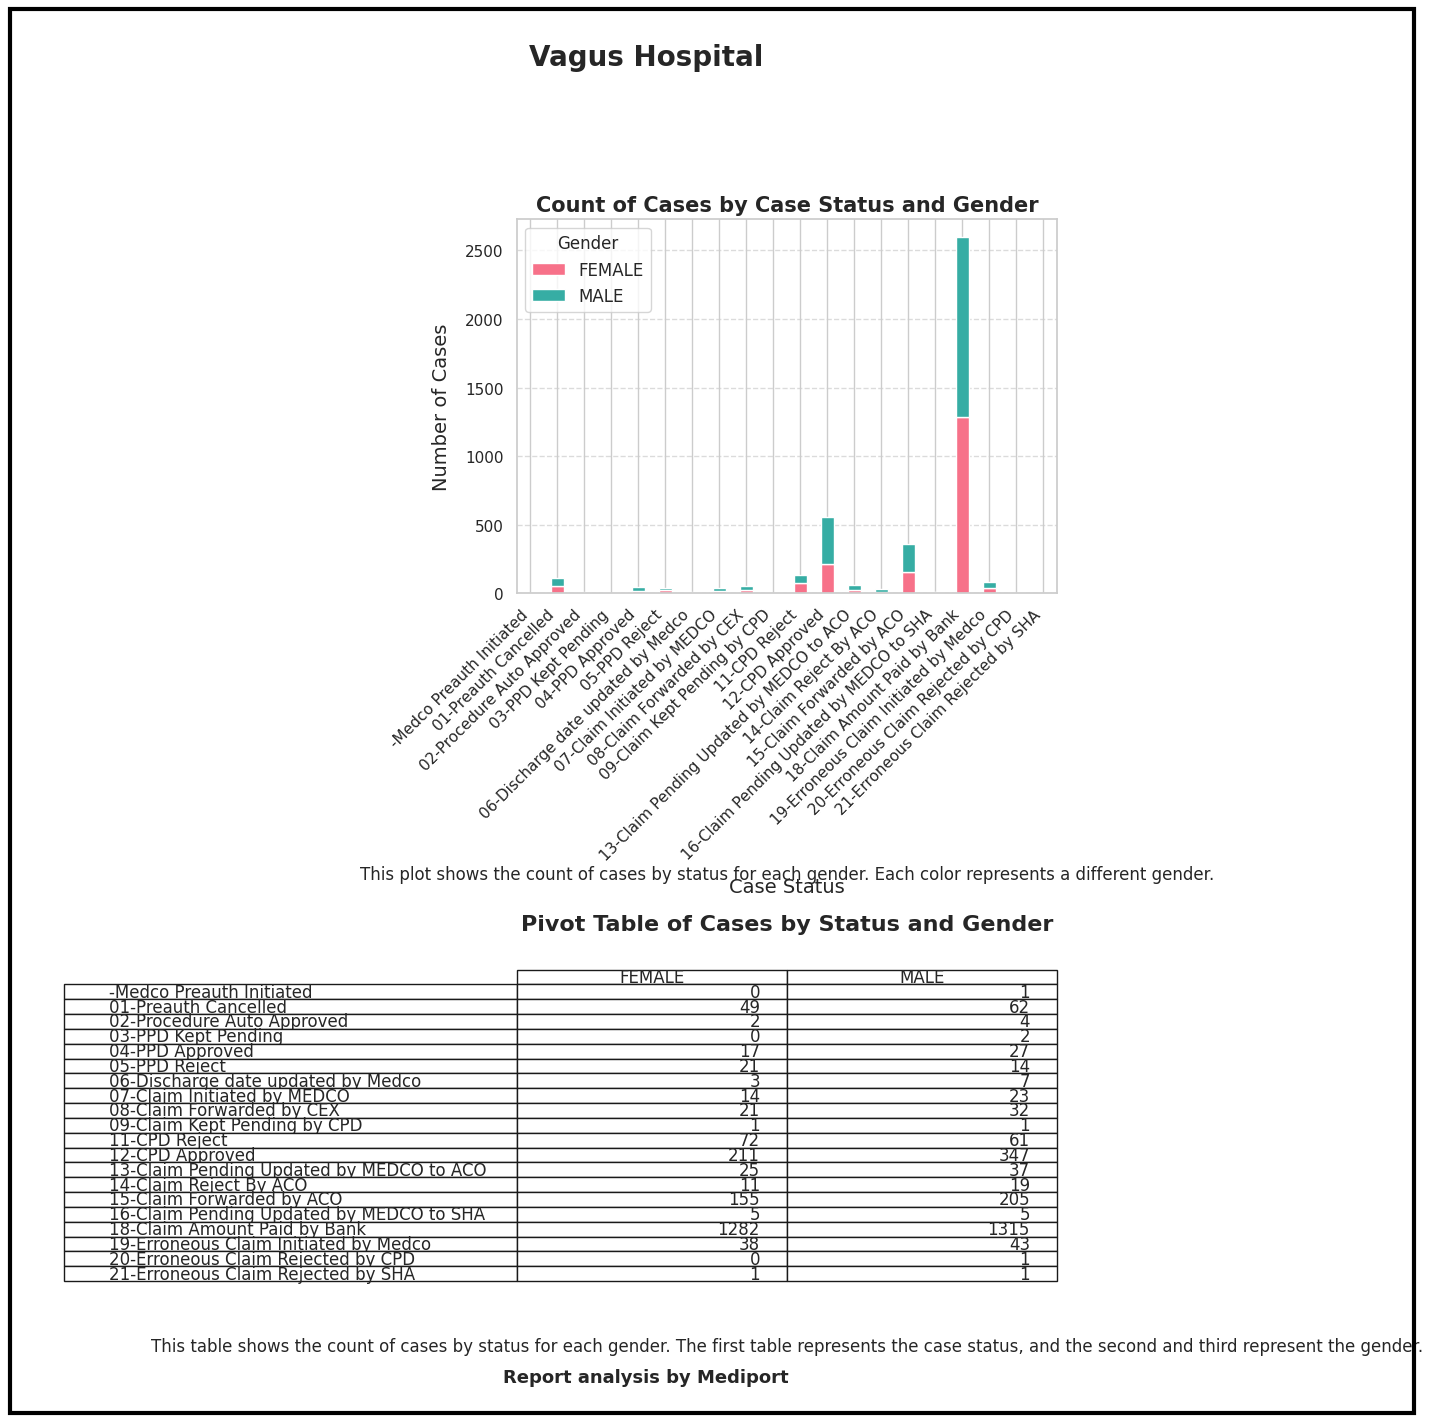

Both the stacked bar plot and pivot table have been saved as combined_counts_and_pivot_table.pdf


In [ ]:
# Step 1: Create the pivot table
pivot_table = pd.pivot_table(
    df,
    values='Case No',  # Use 'Case No' to count the number of cases
    index='Case Status',
    columns='Gender',
    aggfunc='count',
    fill_value=0
)

# Step 2: Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))  # Two rows, one column

# Step 3: Create a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, color=sns.color_palette("husl", len(pivot_table.columns)), ax=axs[0])

# Step 4: Add titles and labels for the bar plot
axs[0].set_title('Count of Cases by Case Status and Gender', fontsize=15, weight='bold')
axs[0].set_xlabel('Case Status', fontsize=14, labelpad=10)
axs[0].set_ylabel('Number of Cases', fontsize=14, labelpad=10)
axs[0].set_xticklabels(pivot_table.index, rotation=45, ha='right')  # Rotate x-axis labels for better readability
axs[0].legend(title='Gender', fontsize=12)  # Add legend for Gender

# Step 5: Add grid lines for better clarity
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Step 6: Create a table for the pivot table in the second subplot
axs[1].axis('off')  # Hide the axis for the pivot table

# Create a table from the pivot table
table = axs[1].table(cellText=pivot_table.values,
                     rowLabels=pivot_table.index,
                     colLabels=pivot_table.columns,
                     loc='center')

# Add a title to the table
axs[1].set_title('Pivot Table of Cases by Status and Gender', fontsize=16, fontweight='bold')

# Add comments to explain the plot
comment_plot = "This plot shows the count of cases by status for each gender. Each color represents a different gender."
plt.text(0.5, -0.75, comment_plot, ha='center', va='center', fontsize=12, transform=axs[0].transAxes)

comment_table = "This table shows the count of cases by status for each gender. The first table represents the case status, and the second and third represent the gender."
plt.text(0.5, -0.09, comment_table, ha='center', va='center', fontsize=12, transform=axs[1].transAxes)

# Add comments under each plot
fig.text(0.5, 0.000000099, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')
fig.text(0.5, 1.1000001, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')

# Step 7: Add a border around the entire figure
border = patches.Rectangle((-0.03, -0.03), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout
plt.tight_layout()

# Save the combined figure as a PDF
plt.savefig('combined_counts_and_pivot_table.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()  # Show the plot

print('Both the stacked bar plot and pivot table have been saved as combined_counts_and_pivot_table.pdf')

## Death by Gender

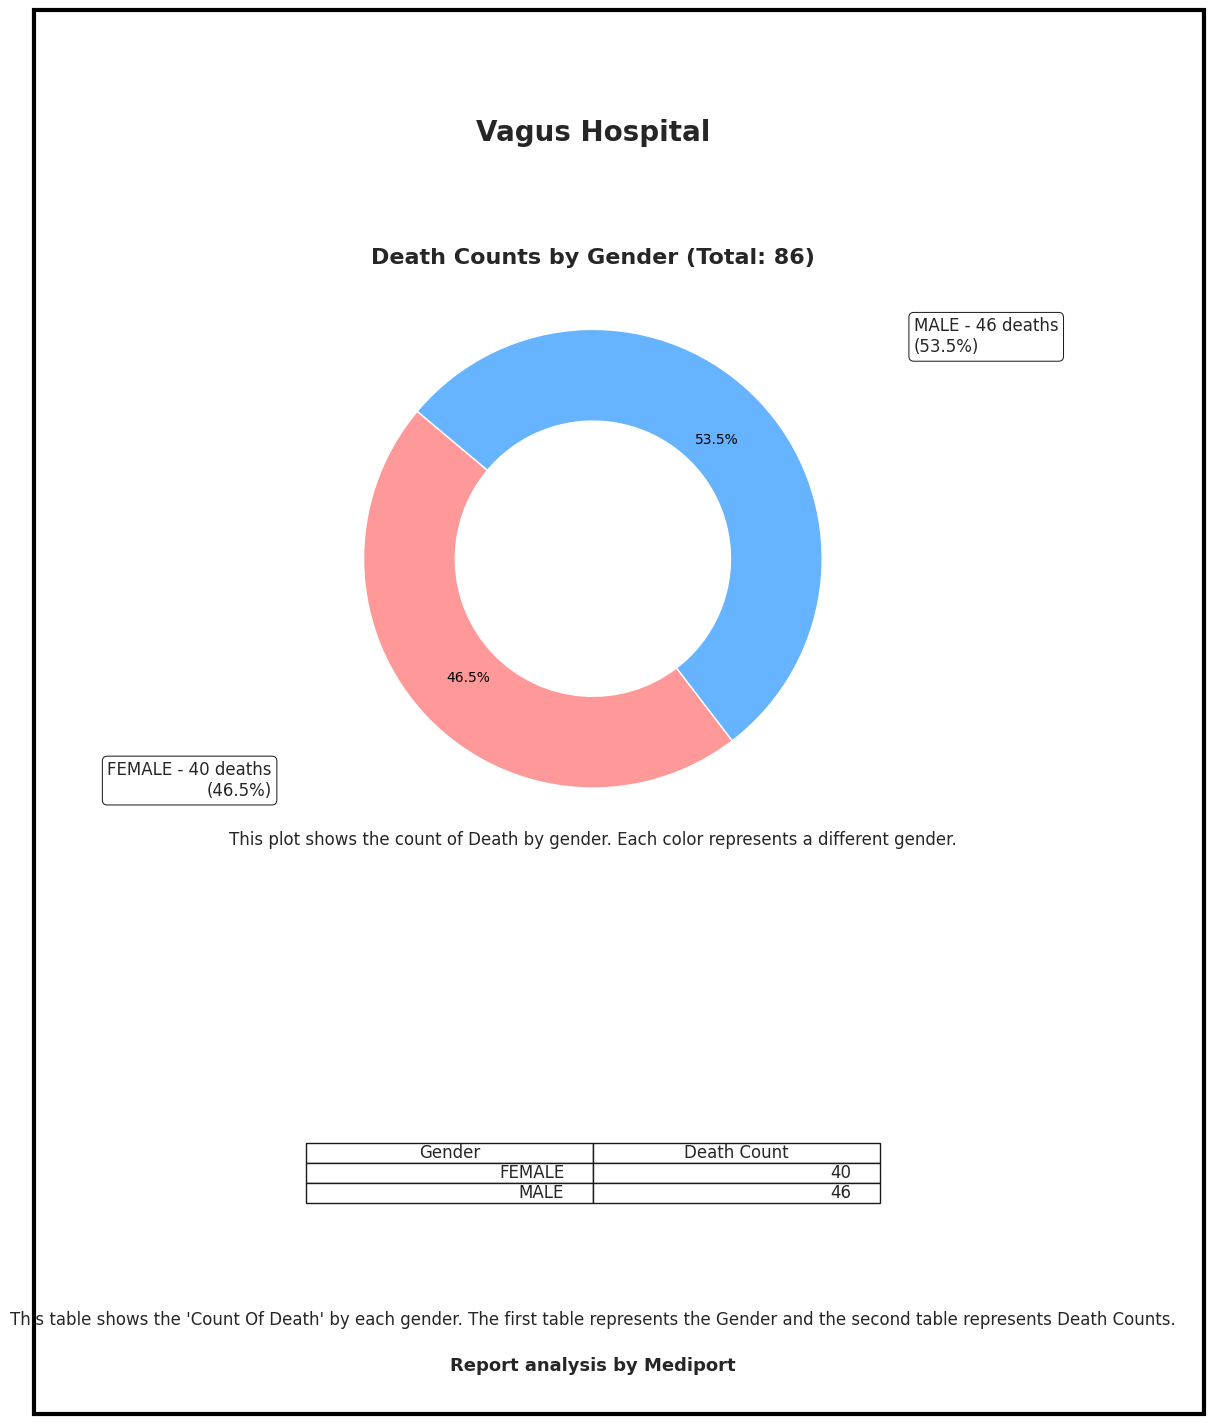

In [ ]:
# Group by Gender where Death Date is not null and count occurrences
gender_death_count = df[df['Death Date'].notnull()].groupby('Gender').size().reset_index(name='Death Count')

# Calculate the total death count
total_deaths = gender_death_count['Death Count'].sum()

# Prepare labels with gender and death counts
labels = [f'{gender} - {count} deaths\n({count/total_deaths:.1%})'
          for gender, count in zip(gender_death_count['Gender'], gender_death_count['Death Count'])]

# Explode the slices for better visibility (optional)
explode = np.where(gender_death_count['Death Count'] / total_deaths < 0.05, 0.2, 0)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})  # Two rows, one column

# Plotting the donut chart (pie chart with a hole in the center)
wedges, texts, autotexts = axs[0].pie(gender_death_count['Death Count'],
                                      wedgeprops=dict(width=0.4),  # Donut chart style
                                      startangle=140,
                                      explode=explode,
                                      pctdistance=0.75,
                                      autopct='%1.1f%%',  # Adding percentage on each slice
                                      colors=['#ff9999', '#66b3ff'])

# Formatting the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Adding annotations with gender, death counts, and percentages
bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axs[0].annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

# Adding a title with the total death count
axs[0].set_title(f'Death Counts by Gender (Total: {total_deaths})', fontsize=16, fontweight='bold')

# Draw a circle in the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
axs[0].add_artist(centre_circle)

# Hide the axis for the second subplot
axs[1].axis('off')

# Create a table for the death count data in the second subplot
table = axs[1].table(cellText=gender_death_count.values,
                     colLabels=gender_death_count.columns,
                     loc='center')

# Add comments to explain the plot
comment_plot = "This plot shows the count of Death by gender. Each color represents a different gender."
plt.text(0.5, 0.009, comment_plot, ha='center', va='center', fontsize=12, transform=axs[0].transAxes)

comment_table = "This table shows the 'Count Of Death' by each gender. The first table represents the Gender and the second table represents Death Counts."
plt.text(0.5, -0.09, comment_table, ha='center', va='center', fontsize=12, transform=axs[1].transAxes)

# Add comments under each plot
fig.text(0.5, -0.019001199, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')
fig.text(0.5, 1.0089001, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')

# Step 7: Add a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout
plt.tight_layout()

# Save the combined figure as a PDF
plt.savefig('death_counts_by_gender_and_table.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()  # Show the plot

# Display the death count data for reference
#print(gender_death_count)

## Death count by age group

<ipython-input-28-db5ea668c078>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')
<ipython-input-28-db5ea668c078>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(pivot_table.index, rotation=45, ha='right')


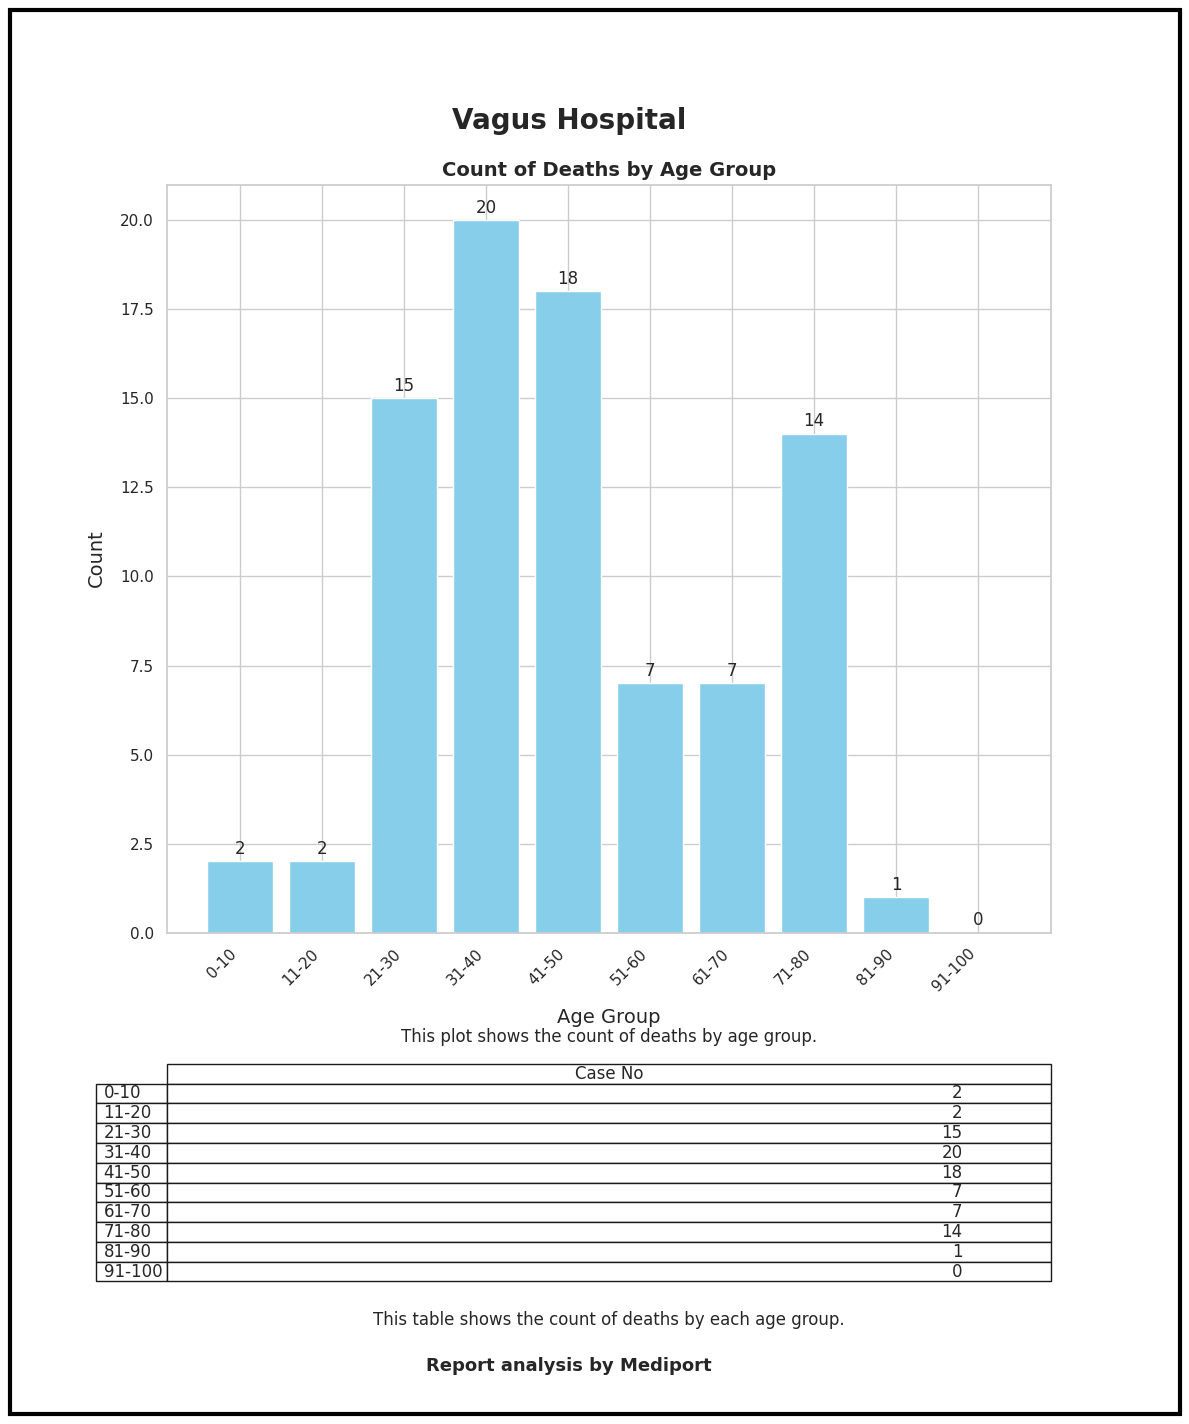

In [ ]:
# Define age group bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age Group' based on the age ranges
df['Age Group'] = pd.cut(df['Age(Years)'], bins=bins, labels=labels, right=False)

# Filter the dataframe to include only rows where 'Death Date' is not null
death_df = df[df['Death Date'].notnull()]

# Create a pivot table to show the count of deaths by age group
pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})

# Create a bar chart for the count of deaths by age group
bars = axs[0].bar(pivot_table.index, pivot_table['Case No'], color='skyblue')
axs[0].set_xlabel('Age Group', fontsize=14, labelpad=10)
axs[0].set_ylabel('Count', fontsize=14, labelpad=10)
axs[0].set_title('Count of Deaths by Age Group', fontsize=14, fontweight='bold')
axs[0].set_xticklabels(pivot_table.index, rotation=45, ha='right')

# Add case count on top of each bar
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12)

# Hide the axis for the second subplot
axs[1].axis('off')

# Create a table for the death count data in the second subplot
table = axs[1].table(cellText=pivot_table.values,
                     colLabels=pivot_table.columns,
                     rowLabels=pivot_table.index,
                     loc='center')

# Add comments to explain the plot
comment_plot = "This plot shows the count of deaths by age group."
axs[0].text(0.5, -0.14, comment_plot, ha='center', va='center', fontsize=12, transform=axs[0].transAxes)

comment_table = "This table shows the count of deaths by each age group."
axs[1].text(0.5, -0.09, comment_table, ha='center', va='center', fontsize=12, transform=axs[1].transAxes)

# Add comments under each plot
fig.text(0.5, -0.019001199, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')
fig.text(0.5, 1.0189001, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')

# Add a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout
plt.tight_layout()

# Save the combined figure as a single PDF file
plt.savefig('age_group_death_count_and_table.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()

## Age

<ipython-input-27-99217745f952>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, index='Age Group', values='Case No', aggfunc='count')


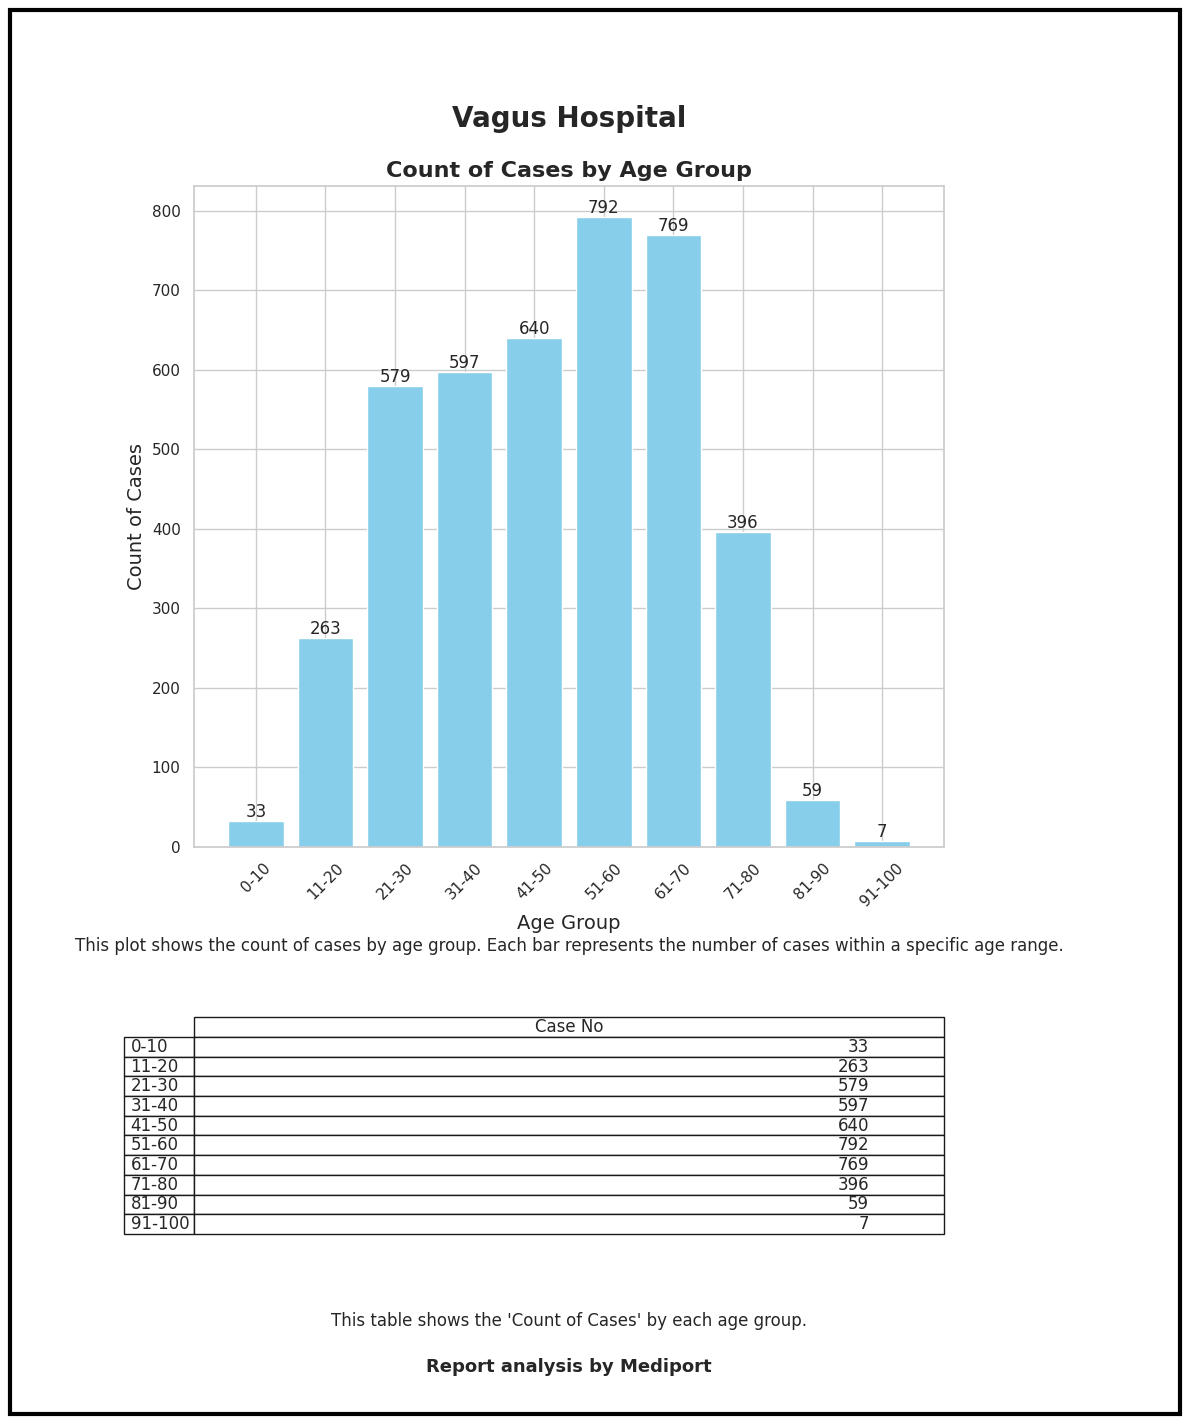

In [ ]:
# Define age group bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age Group' based on the age ranges
df['Age Group'] = pd.cut(df['Age(Years)'], bins=bins, labels=labels, right=False)

# Create a pivot table to show the count of cases by age group
pivot_table = pd.pivot_table(df, index='Age Group', values='Case No', aggfunc='count')

# Set up the figure with two subplots for the bar plot and table
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot the bar chart
bars = axs[0].bar(pivot_table.index, pivot_table['Case No'], color='skyblue')
axs[0].set_xlabel('Age Group', fontsize=14)
axs[0].set_ylabel('Count of Cases', fontsize=14)
axs[0].set_title('Count of Cases by Age Group', fontsize=16, fontweight='bold')
axs[0].tick_params(axis='x', rotation=45)

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12)

# Hide the axis for the second subplot (table)
axs[1].axis('off')

# Display the table below the bar chart
axs[1].table(cellText=pivot_table.values, rowLabels=pivot_table.index, colLabels=pivot_table.columns, loc='center')

# Add comments to explain the plot and table
comment_plot = "This plot shows the count of cases by age group. Each bar represents the number of cases within a specific age range."
plt.text(0.5, -0.15, comment_plot, ha='center', va='center', fontsize=12, transform=axs[0].transAxes)

comment_table = "This table shows the 'Count of Cases' by each age group."
plt.text(0.5, -0.09, comment_table, ha='center', va='center', fontsize=12, transform=axs[1].transAxes)

# Add a title and footer to the entire figure
fig.text(0.5, 1.02, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
fig.text(0.5, -0.02, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')

# Add a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout
plt.tight_layout()

# Save the combined figure as a PDF file
plt.savefig('age_group_cases_bar_table.pdf', bbox_inches='tight', pad_inches=0.5)
plt.show()

## Gender

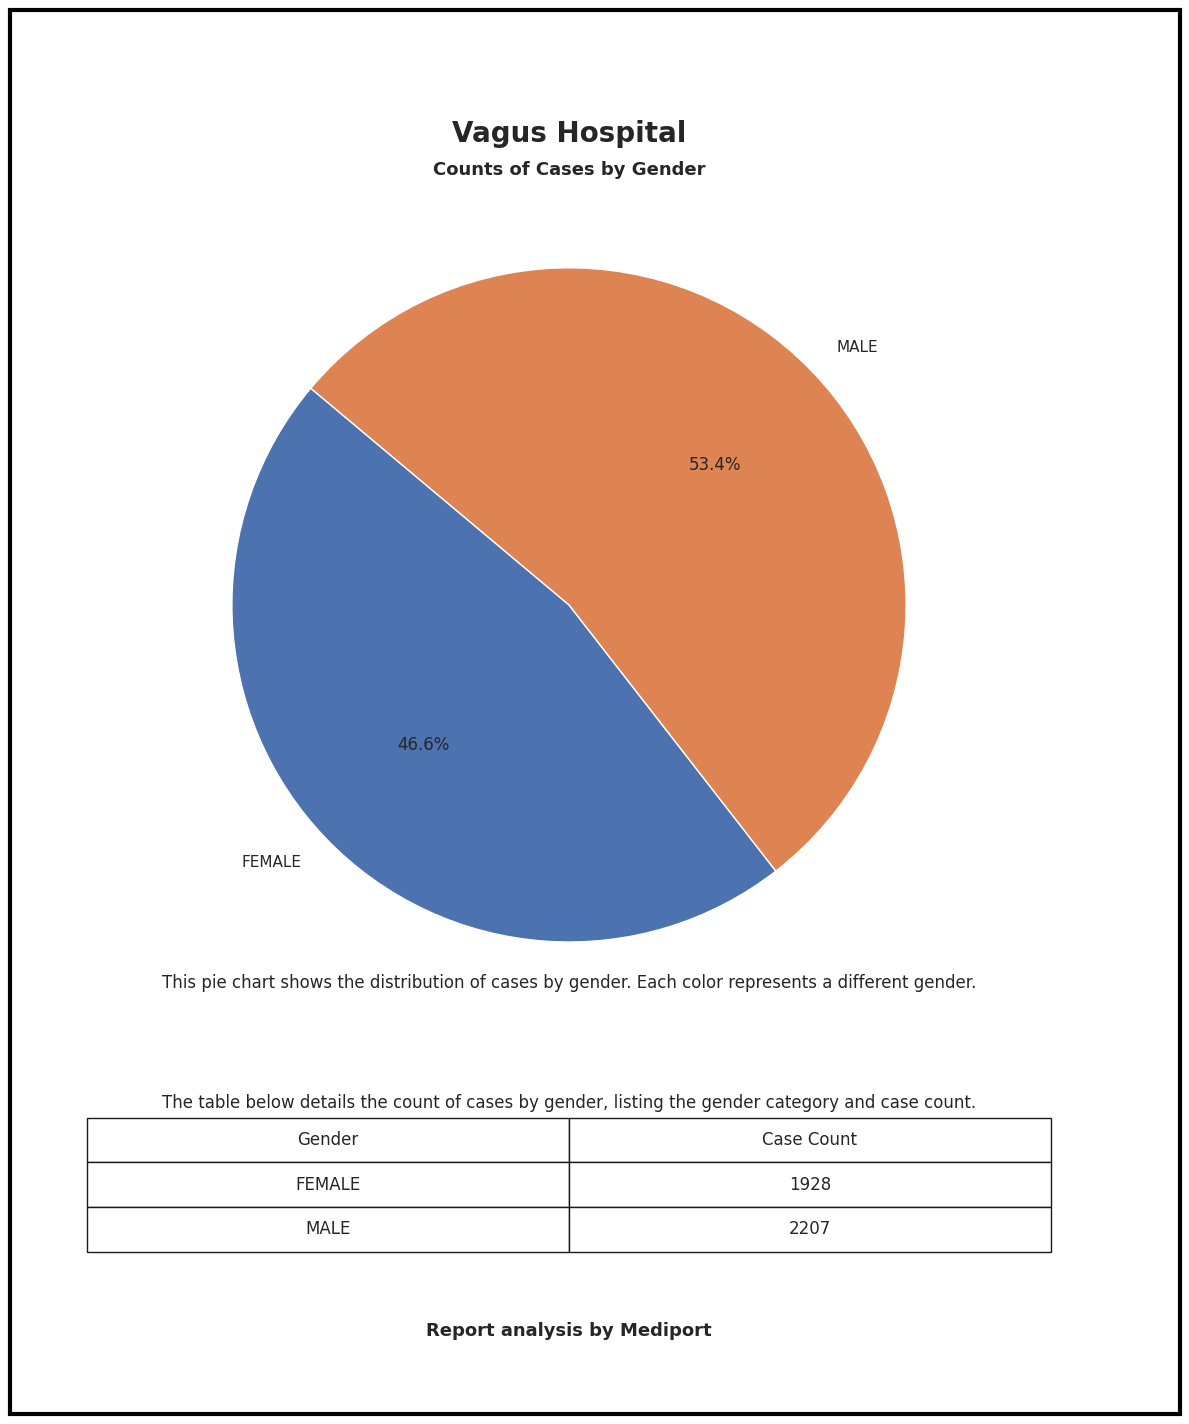

In [ ]:
# Define column name for gender
genderAll = 'Gender'

# Count cases by gender
gender_case_count = df.groupby(genderAll).size().reset_index(name='Case Count')

# Set up the figure and grid layout
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})

# Plot the pie chart in the first subplot
axs[0].pie(gender_case_count['Case Count'], labels=gender_case_count[genderAll], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Counts of Cases by Gender', fontsize=13, fontweight='bold')

# Display the table in the second subplot
axs[1].axis('off')
table = axs[1].table(cellText=gender_case_count.values,
                     colLabels=gender_case_count.columns,
                     cellLoc='center',
                     loc='center')
table.scale(1, 2)  # Adjust table size if needed

# Add descriptive comments for the plot and table
comment_plot = "This pie chart shows the distribution of cases by gender. Each color represents a different gender."
fig.text(0.5, 0.3, comment_plot, ha='center', va='center', fontsize=12)

comment_table = "The table below details the count of cases by gender, listing the gender category and case count."
fig.text(0.5, 0.2, comment_table, ha='center', va='center', fontsize=12)

# Add the title and footer to the entire figure
fig.text(0.5, 1.0079001, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.01, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')

# Draw a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout and save the figure as a PDF
plt.tight_layout()
fig.savefig('Gender_and_Table.pdf', bbox_inches='tight', pad_inches=0.5, format='pdf')
plt.show()

## Case type

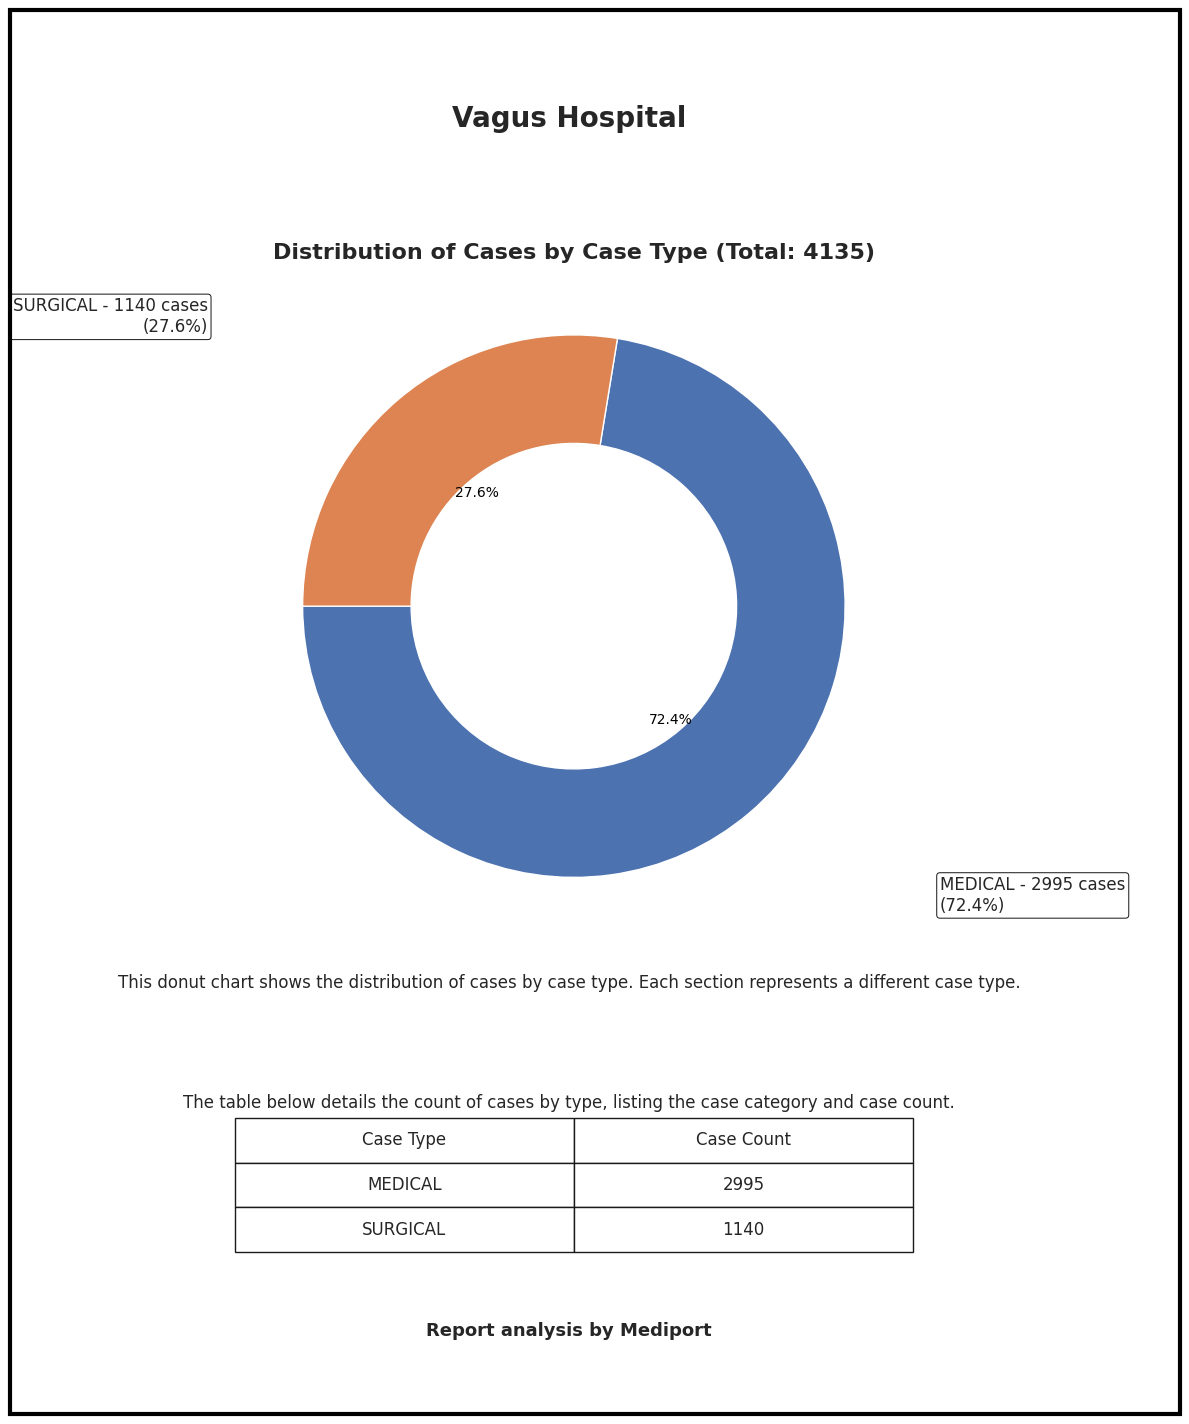

In [ ]:
# Define column name for Case Type
CaseType = 'Case Type'

# Group the data by 'Case Type' and count the cases
case_type_count = df.groupby(CaseType).size().reset_index(name='Case Count')

# Calculate the total number of cases
total_cases = case_type_count['Case Count'].sum()

# Prepare labels with case type, case counts, and percentages
labels = [f'{case_type} - {count} cases\n({count/total_cases:.1%})'
          for case_type, count in zip(case_type_count[CaseType], case_type_count['Case Count'])]

# Explode the slices with fewer cases for better visibility
explode = np.where(case_type_count['Case Count'] / total_cases < 0.05, 0.2, 0)

# Set up the figure and grid layout
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})

# Plot the donut chart in the first subplot
wedges, texts, autotexts = axs[0].pie(case_type_count['Case Count'],
                                      labels=None,  # Use custom labels instead
                                      wedgeprops=dict(width=0.4),
                                      startangle=180,
                                      explode=explode,
                                      pctdistance=0.55,
                                      autopct='%1.1f%%')

# Set font size and color for percentage text inside wedges
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Add annotations with case types, counts, and percentages
bbox_props = dict(boxstyle="round,pad=0.2", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axs[0].annotate(labels[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                    horizontalalignment=horizontalalignment, **kw)

# Add title to the donut chart
axs[0].set_title(f'Distribution of Cases by Case Type (Total: {total_cases})', fontsize=16, fontweight='bold')

# Draw a white circle in the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
axs[0].add_artist(centre_circle)

# Display the table in the second subplot
axs[1].axis('off')
table = axs[1].table(cellText=case_type_count.values,
                     colLabels=case_type_count.columns,
                     cellLoc='center',
                     loc='center')
table.scale(1, 2)  # Adjust table size if needed

# Add descriptive comments below the chart and table
comment_plot = "This donut chart shows the distribution of cases by case type. Each section represents a different case type."
fig.text(0.5, 0.3, comment_plot, ha='center', va='center', fontsize=12)

comment_table = "The table below details the count of cases by type, listing the case category and case count."
fig.text(0.5, 0.2, comment_table, ha='center', va='center', fontsize=12)

# Add the title and footer to the entire figure
fig.text(0.5, 1.02, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.01, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')

# Draw a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout and save the figure as a PDF
plt.tight_layout()
fig.savefig('Case_Type_Distribution_and_Table.pdf', bbox_inches='tight', pad_inches=0.5, format='pdf')
plt.show()

## Location

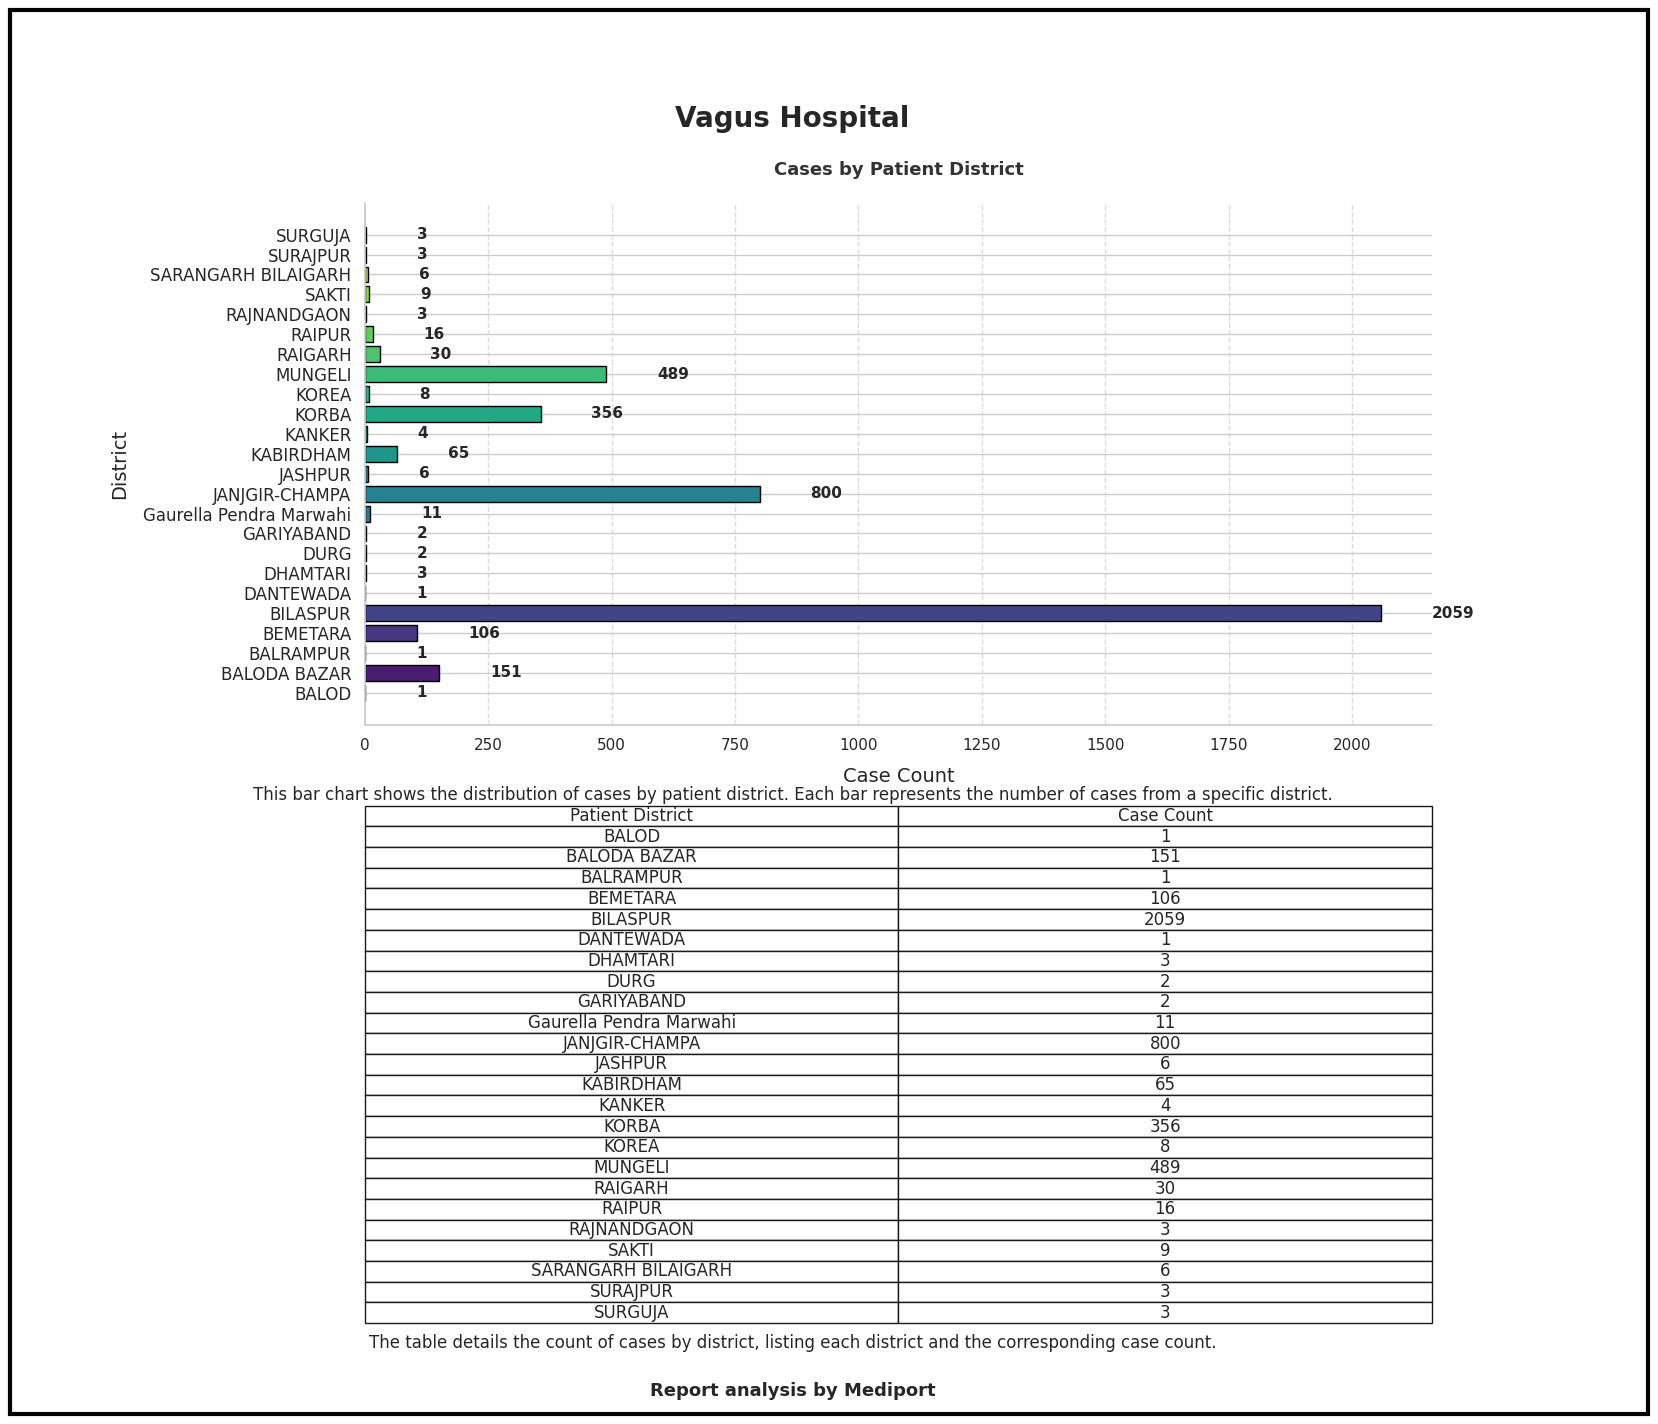

In [ ]:
# Define column name for Patient District
patient_district = 'Patient District'

# Group the data by 'Patient District' and count the cases
district_case_count = df.groupby(patient_district).size().reset_index(name='Case Count')

# Create a new figure for the combined plot and table
combined_fig = plt.figure(figsize=(14, 12))

# Create the horizontal bar plot in the first subplot
ax_plot = combined_fig.add_subplot(211)  # First subplot for the bar plot
bars = ax_plot.barh(district_case_count[patient_district], district_case_count['Case Count'],
                    color=sns.color_palette("viridis", len(district_case_count)), edgecolor='black')

# Adding case count labels to the right of the bars
for bar in bars:
    width = bar.get_width()
    ax_plot.text(width + 0.05 * max(district_case_count['Case Count']), bar.get_y() + bar.get_height()/2,
                 f'{width}', ha='left', va='center', fontsize=11, fontweight='bold')

# Adding title and axis labels
ax_plot.set_title(f'Cases by {patient_district}', fontsize=13, weight='bold', pad=20, color='#333333')
ax_plot.set_ylabel('District', fontsize=14, labelpad=10)
ax_plot.set_xlabel('Case Count', fontsize=14, labelpad=10)
plt.yticks(fontsize=12)

# Improve grid and background styling for clarity
ax_plot.grid(True, axis='x', linestyle='--', alpha=0.7)
ax_plot.spines['top'].set_visible(False)  # Removing the top spine for a cleaner look
ax_plot.spines['right'].set_visible(False)  # Removing the right spine for a cleaner look

# Create the table in the second subplot
ax_table = combined_fig.add_subplot(212)  # Second subplot for the table
ax_table.axis('off')  # Hide the axes for the table

# Display the table without percentage
table = ax_table.table(cellText=district_case_count[['Patient District', 'Case Count']].values,
                       colLabels=['Patient District', 'Case Count'],
                       cellLoc='center', loc='center')

# Add descriptive comments for the plot and table
comment_plot = "This bar chart shows the distribution of cases by patient district. Each bar represents the number of cases from a specific district."
combined_fig.text(0.5, 0.45689999, comment_plot, ha='center', va='center', fontsize=12)

comment_table = "The table details the count of cases by district, listing each district and the corresponding case count."
combined_fig.text(0.5, -0.0001, comment_table, ha='center', va='center', fontsize=12)

# Add the title and footer to the entire figure
combined_fig.text(0.5, 1.02, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
combined_fig.text(0.5, -0.0399, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')

# Draw a border around the entire figure
border = patches.Rectangle((-0.059, -0.059), 1.17, 1.17, transform=combined_fig.transFigure, color='black', linewidth=3, fill=False)
combined_fig.patches.append(border)

# Adjust layout to prevent overlap
combined_fig.tight_layout()

# Save the combined figure as a PDF
combined_fig.savefig('District_Cases_Combined.pdf', bbox_inches='tight', pad_inches=0.5, format='pdf')

# Show the combined figure
plt.show()

##  Case Status claim amount

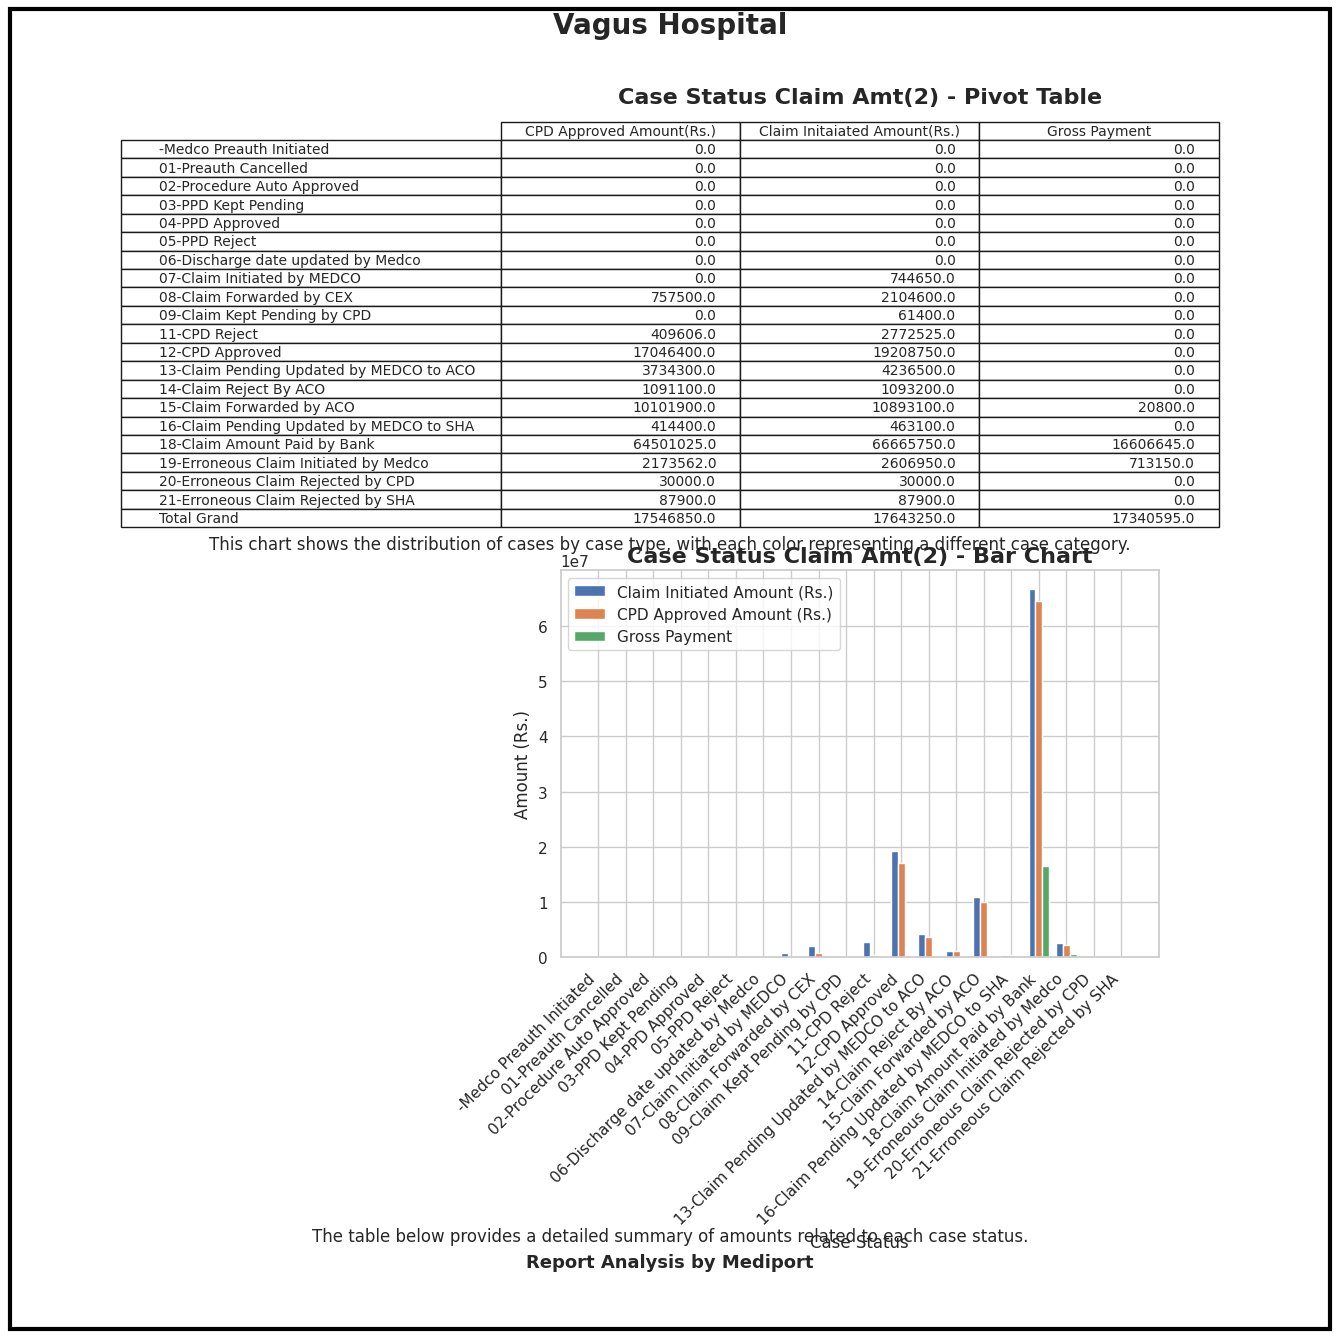

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# Assuming df is your DataFrame with the relevant data
# Create the pivot table
pivot_table = pd.pivot_table(
    df,
    values=['Claim Initaiated Amount(Rs.)', 'CPD Approved Amount(Rs.)', 'Gross Payment'],
    index='Case Status',
    aggfunc='sum',
    margins=True,
    margins_name='Total Grand'
)

# Dropping the 'Total Grand' row for clarity in the bar chart
pivot_table_no_total = pivot_table.drop('Total Grand')

# Create a figure with two subplots (one for table and one for bar chart)
fig, (ax_table, ax_chart) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# ----- First subplot: Pivot Table -----
ax_table.axis('off')  # Hide the axis for the table
table = ax_table.table(cellText=pivot_table.values, rowLabels=pivot_table.index,
                       colLabels=pivot_table.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size for better readability

# Adding a title above the table
ax_table.set_title('Case Status Claim Amt(2) - Pivot Table', fontsize=16, fontweight='bold', pad=20)

# ----- Second subplot: Bar Chart -----
bar_width = 0.25
index = np.arange(len(pivot_table_no_total))

# Plotting each category as grouped bars
ax_chart.bar(index, pivot_table_no_total['Claim Initaiated Amount(Rs.)'], bar_width, label='Claim Initiated Amount (Rs.)')
ax_chart.bar(index + bar_width, pivot_table_no_total['CPD Approved Amount(Rs.)'], bar_width, label='CPD Approved Amount (Rs.)')
ax_chart.bar(index + 2 * bar_width, pivot_table_no_total['Gross Payment'], bar_width, label='Gross Payment')

# Adding labels and title to the bar chart
ax_chart.set_xlabel('Case Status')
ax_chart.set_ylabel('Amount (Rs.)')
ax_chart.set_title('Case Status Claim Amt(2) - Bar Chart', fontsize=16, fontweight='bold')
ax_chart.set_xticks(index + bar_width)
ax_chart.set_xticklabels(pivot_table_no_total.index, rotation=45, ha='right')

# Adding legend
ax_chart.legend()

# Add descriptive comments below the chart and table
comment_plot = "This chart shows the distribution of cases by case type, with each color representing a different case category."
fig.text(0.5, 0.60, comment_plot, ha='center', fontsize=12)

comment_table = "The table below provides a detailed summary of amounts related to each case status."
fig.text(0.5, 0.023, comment_table, ha='center', fontsize=12)

# Add the title and footer to the entire figure
fig.text(0.5, 1.03, 'Vagus Hospital', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.002, 'Report Analysis by Mediport', ha='center', fontsize=13, fontweight='bold')

# Draw a border around the entire figure
border = patches.Rectangle((-0.05, -0.05), 1.1, 1.1, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout to prevent overlap and save the figure as a PDF
plt.tight_layout()

with PdfPages("combined_case_status_claim_amt.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)

plt.show()

## case status claim amount  and case status claim amount 1

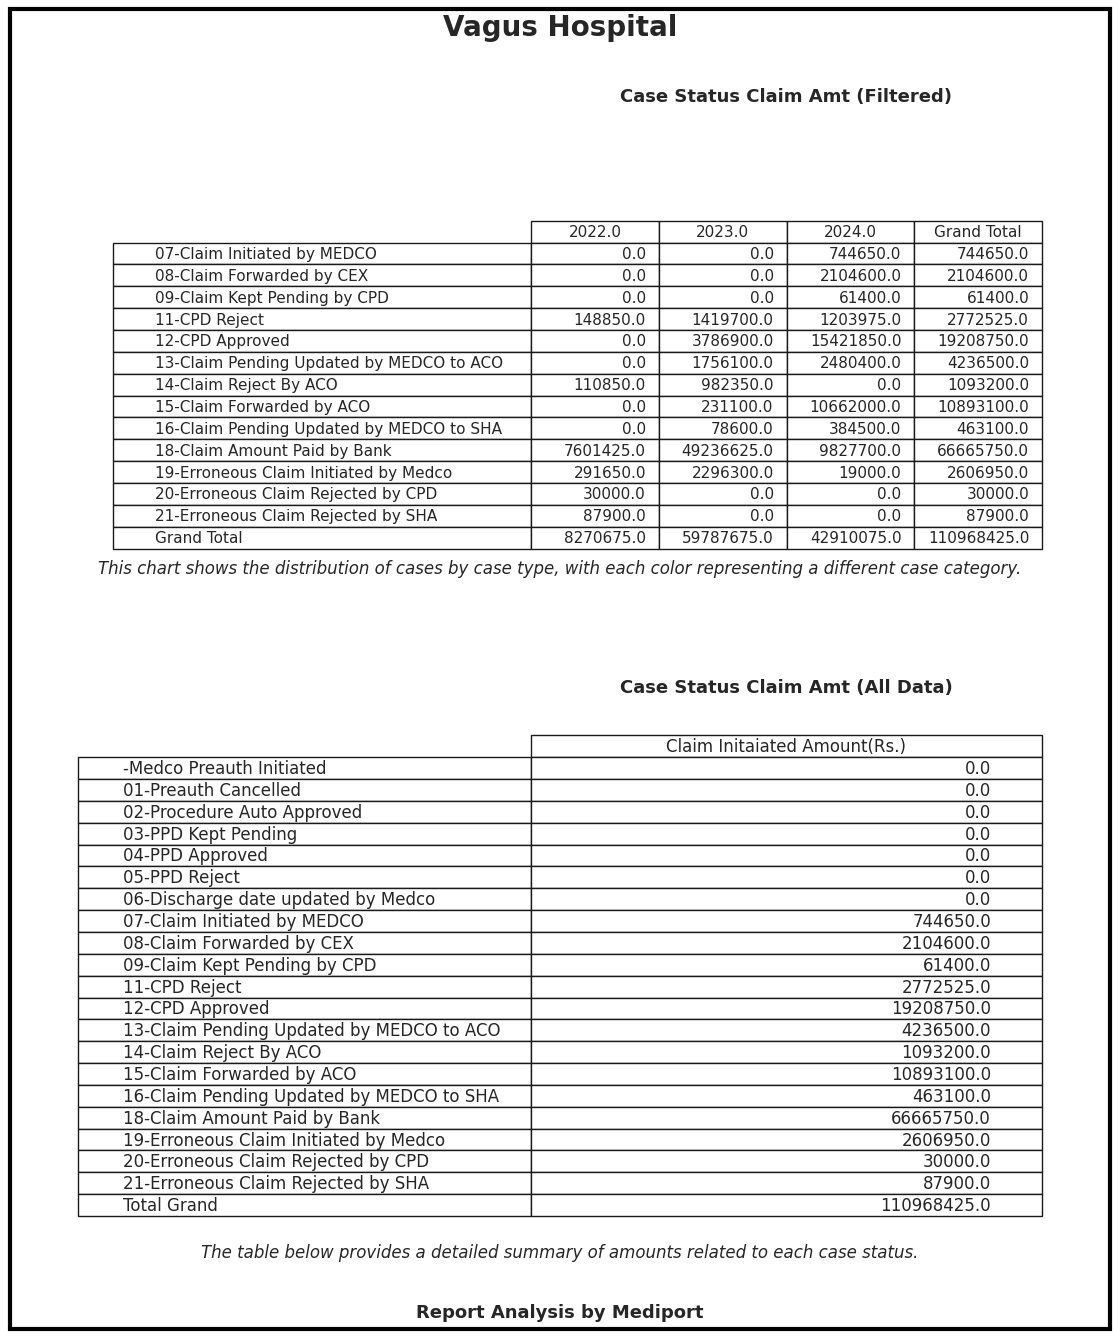

In [ ]:
# Convert 'Claim Submitted Date' to datetime
df['Claim Submitted Date'] = pd.to_datetime(df['Claim Submitted Date'], errors='coerce')

# Extract the year from 'Claim Submitted Date'
df['Year'] = df['Claim Submitted Date'].dt.year

# Filter the data for years 2022, 2023, and 2024
df_filtered = df[df['Year'].isin([2022, 2023, 2024])]

# Create a pivot table for filtered data with 'Case Status' as rows and years as columns
pivot_table_filtered = pd.pivot_table(
    df_filtered,
    values='Claim Initaiated Amount(Rs.)',
    index='Case Status',
    columns='Year',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Grand Total'
)

# Create a pivot table for all data with 'Case Status' as rows
pivot_table_all = pd.pivot_table(
    df,
    values='Claim Initaiated Amount(Rs.)',
    index='Case Status',
    aggfunc='sum',
    margins=True,
    margins_name='Total Grand'
)

# Create a figure with subplots for both tables
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Hide the axes for both tables
ax1.axis('off')
ax2.axis('off')

# Create a table from the filtered pivot table
table_filtered = ax1.table(cellText=pivot_table_filtered.values,
                            rowLabels=pivot_table_filtered.index,
                            colLabels=pivot_table_filtered.columns,
                            loc='center')
ax1.set_title('Case Status Claim Amt (Filtered)', fontsize=13, fontweight='bold')

# Create a table from the all-data pivot table
table_all = ax2.table(cellText=pivot_table_all.values,
                      rowLabels=pivot_table_all.index,
                      colLabels=pivot_table_all.columns,
                      loc='center')
ax2.set_title('Case Status Claim Amt (All Data)', fontsize=13, fontweight='bold')

# Add descriptive comments below the chart and table
comment_plot = "This chart shows the distribution of cases by case type, with each color representing a different case category."
fig.text(0.5, 0.58, comment_plot, ha='center', fontsize=12, fontstyle='italic')

comment_table = "The table below provides a detailed summary of amounts related to each case status."
fig.text(0.5, 0.01, comment_table, ha='center', fontsize=12, fontstyle='italic')

# Add the title and footer to the entire figure
fig.text(0.5, 1.028, 'Vagus Hospital', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, -0.04, 'Report Analysis by Mediport', ha='center', fontsize=13, fontweight='bold')

# Draw a border around the entire figure
border = patches.Rectangle((-0.05, -0.05), 1.1, 1.1, transform=fig.transFigure, color='black', linewidth=3, fill=False)
fig.patches.append(border)

# Adjust layout and save the figure as an image
plt.tight_layout()
plt.savefig('case_status_claim_amt_combined.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

##  Difference between claim initiate amount - approval amount

In [ ]:
# Calculate the amount difference between 'Claim Initaiated Amount(Rs.)' and 'CPD Approved Amount(Rs.)'
df['Amount Difference'] = df['Claim Initaiated Amount(Rs.)'] - df['CPD Approved Amount(Rs.)']

# Create a pivot table with 'Case Status' as rows and 'Actual Registration Date' as columns
pivot_table = df.pivot_table(
    index='Case Status',  # Row grouping
    columns='Actual Registration Date',  # Column grouping
    values='Amount Difference',  # Value to aggregate
    aggfunc='sum',  # Aggregation function
    fill_value=0  # Replace missing values with 0
)

# Calculate the total amount for each year and add it as a new row called 'Total Grand'
total_amount = pivot_table.sum()
pivot_table.loc['Total Grand'] = total_amount

# Save the pivot table to an Excel file
pivot_table.to_excel('diffe_between_claim_inti_appro.xlsx')

# Display the pivot table to ensure it is created correctly
#print(pivot_table)

## Family Id

In [ ]:
# Group the data by 'Family Id' and filter where 'Family Id' occurs more than once
family_counts = df.groupby('Family Id').filter(lambda x: len(x) > 1)

# Create a pivot table with 'Family Id' as the index, count 'Case No', and sum 'Claim Initaiated Amount(Rs.)'
pivot_table = pd.pivot_table(
    family_counts,
    values=['Case No', 'Claim Initaiated Amount(Rs.)'],
    index='Family Id',
    aggfunc={'Case No': 'count', 'Claim Initaiated Amount(Rs.)': 'sum'},
    fill_value=0
)

# Add a 'Grand Total' row
pivot_table.loc['Grand Total'] = pivot_table.sum()

# Rename columns for clarity
pivot_table.columns = ['Count of Case No', 'Sum of Claim Initiated Amount (Rs.)']

# Display the pivot table
pivot_table.to_excel('Case_Status_Number_&_Family_id.xlsx')

# Free Version

<ipython-input-19-8d786643ca7b>:57: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')
<ipython-input-19-8d786643ca7b>:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(pivot_table.index, rotation=45)


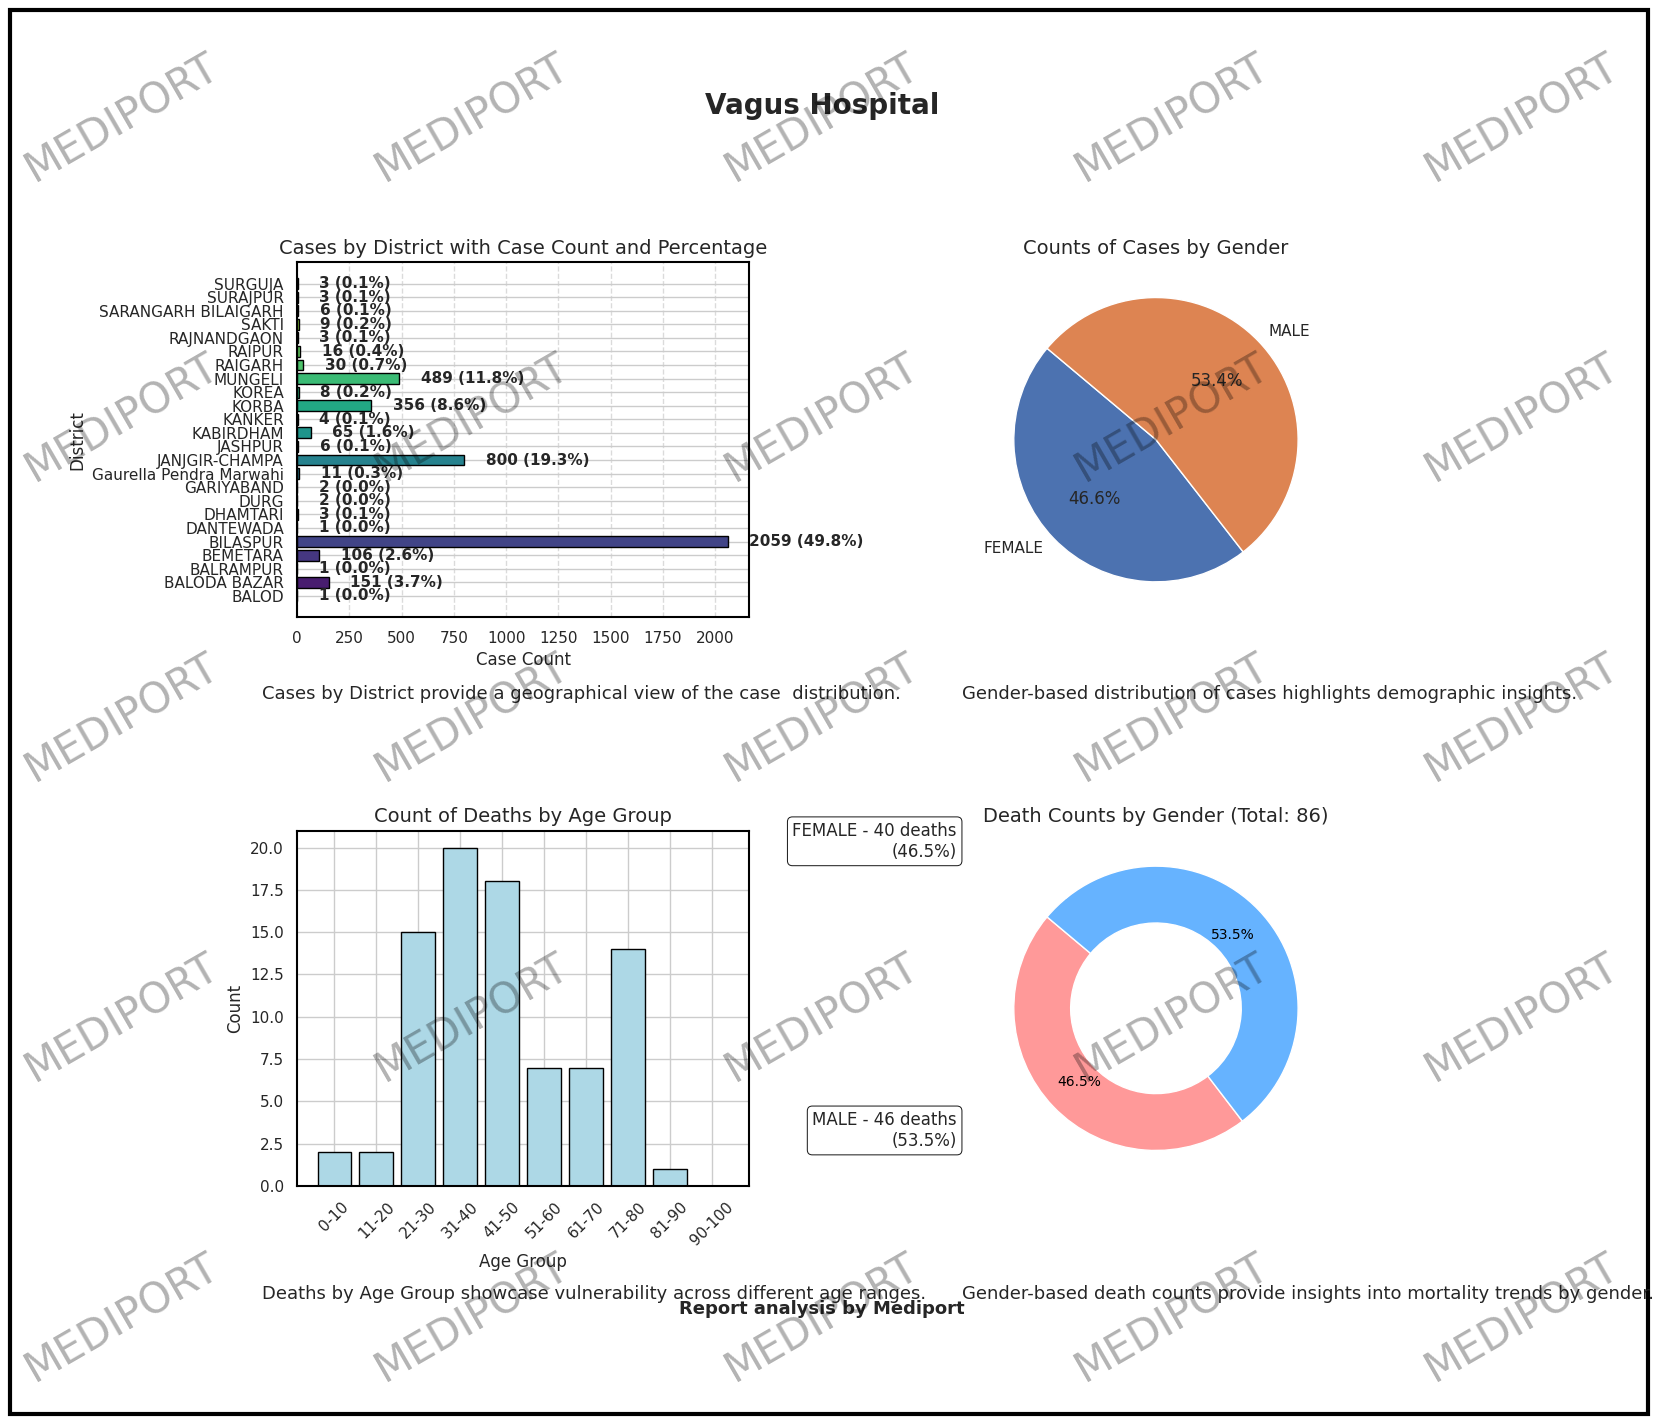

In [ ]:
# Function to add diagonal watermark
def add_diagonal_watermarks(fig, text, alpha=0.30, fontsize=30, rotation=30, spacing=0.25):
    for x in np.arange(0, 1 + spacing, spacing):
        for y in np.arange(0, 1 + spacing, spacing):
            fig.text(x, y, text, fontsize=fontsize, color='black',
                     ha='center', va='center', alpha=alpha, rotation=rotation)


# Assuming df is the dataframe with the data, including 'Patient District', 'Age(Years)', 'Death Date', 'Gender'

# Grouping the data by 'Patient District' and counting the cases
patient_district = 'Patient District'
district_case_count = df.groupby(patient_district).size().reset_index(name='Case Count')

# Calculate the percentage of cases for each district
total_cases = district_case_count['Case Count'].sum()
district_case_count['Percentage'] = (district_case_count['Case Count'] / total_cases) * 100

# Seaborn theme for a cleaner look
sns.set_theme(style="whitegrid")

# Colors for the bars - using a different palette
colors = sns.color_palette("viridis", len(district_case_count))

# Create a PDF to save the final result
with PdfPages('charts_summary_with_watermark.pdf') as pdf:

    # Create figure and GridSpec for a 2x2 layout
    fig = plt.figure(figsize=(14, 12))
    gs = plt.GridSpec(2, 2, wspace=0.4, hspace=0.6)

    # First plot: District Case Count (Horizontal Bar Plot)
    ax1 = fig.add_subplot(gs[0, 0])
    bars = ax1.barh(district_case_count[patient_district], district_case_count['Case Count'],
                    color=colors, edgecolor='black', label='Case Count')
    for bar, case_count, percentage in zip(bars, district_case_count['Case Count'], district_case_count['Percentage']):
        width = bar.get_width()
        ax1.text(width + 0.05 * max(district_case_count['Case Count']), bar.get_y() + bar.get_height()/2,
                 f'{case_count} ({percentage:.1f}%)', ha='left', va='center', fontsize=11, fontweight='bold')
    ax1.set_title('Cases by District with Case Count and Percentage', fontsize=14)
    ax1.set_xlabel('Case Count')
    ax1.set_ylabel('District')
    ax1.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Second plot: Gender Case Distribution (Pie Chart)
    genderAll = 'Gender'
    gender_case_count = df.groupby(genderAll).size().reset_index(name='Case Count')
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.pie(gender_case_count['Case Count'], labels=gender_case_count[genderAll], autopct='%1.1f%%', startangle=140)
    ax2.set_title('Counts of Cases by Gender', fontsize=14)

    # Third plot: Death Counts by Age Group (Bar Chart)
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80','81-90','90-100']
    df['Age Group'] = pd.cut(df['Age(Years)'], bins=bins, labels=labels, right=False)
    death_df = df[df['Death Date'].notnull()]
    pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')

    ax3 = fig.add_subplot(gs[1, 0])
    ax3.bar(pivot_table.index, pivot_table['Case No'], color='lightblue', edgecolor='black')
    ax3.set_xlabel('Age Group')
    ax3.set_ylabel('Count')
    ax3.set_title('Count of Deaths by Age Group', fontsize=14)
    ax3.set_xticklabels(pivot_table.index, rotation=45)

    # Fourth plot: Death Counts by Gender (Donut Chart)
    gender_death_count = df[df['Death Date'].notnull()].groupby('Gender').size().reset_index(name='Death Count')
    total_deaths = gender_death_count['Death Count'].sum()
    labels = [f'{gender} - {count} deaths\n({count/total_deaths:.1%})'
              for gender, count in zip(gender_death_count['Gender'], gender_death_count['Death Count'])]
    explode = np.where(gender_death_count['Death Count'] / total_deaths < 0.05, 0.2, 0)

    ax4 = fig.add_subplot(gs[1, 1], aspect='equal')
    wedges, texts, autotexts = ax4.pie(gender_death_count['Death Count'], wedgeprops=dict(width=0.4),
                                       startangle=140, explode=explode, pctdistance=0.75,
                                       autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    for i, p in enumerate(wedges):
        ang, x, y = (p.theta2 - p.theta1) / 2. + p.theta1, np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
        ax4.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.4*y),
                     horizontalalignment={-1: "right", 1: "left"}[int(np.sign(x))], arrowprops=dict(arrowstyle="-", connectionstyle=f"angle,angleA=0,angleB={ang}"),
                     bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72))
    ax4.set_title(f'Death Counts by Gender (Total: {total_deaths})', fontsize=14)

    # Add borders around each plot and captions
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.5)

    # Add comments under each plot
    #fig.text(0.5, 0.96, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
    fig.text(0.1, 0.52, 'Cases by District provide a geographical view of the case  distribution.', ha='left', va='center', fontsize=13)
    fig.text(0.6, 0.52, 'Gender-based distribution of cases highlights demographic insights.', ha='left', va='center', fontsize=13)
    fig.text(0.1, 0.02, 'Deaths by Age Group showcase vulnerability across different age ranges.', ha='left', va='center', fontsize=13)
    fig.text(0.6, 0.02, 'Gender-based death counts provide insights into mortality trends by gender.', ha='left', va='center', fontsize=13)

    # Add comments under each plot
    fig.text(0.5, 0.0079, 'Report analysis by Mediport', ha='center', va='center', fontsize=13, fontweight='bold')
    fig.text(0.5, 1.009941, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')

    # Add a full-page bold border
    # Step 7: Add a border around the entire figure
    border = patches.Rectangle((-0.08, -0.08), 1.17, 1.17, transform=fig.transFigure, color='black', linewidth=3, fill=False)
    fig.patches.append(border)

    # Add diagonal watermarks across the entire page
    add_diagonal_watermarks(plt.gcf(), 'MEDIPORT', alpha=0.30, fontsize=30, rotation=30, spacing=0.25)

    # Save the figure into the PDF
    pdf.savefig(fig, bbox_inches='tight')

plt.show()



<ipython-input-20-33a64c179472>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')
<ipython-input-20-33a64c179472>:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  case_type_counts = pd.pivot_table(df, values='Case No', index='Age Group', columns='Case Type', aggfunc='count', fill_value=0)


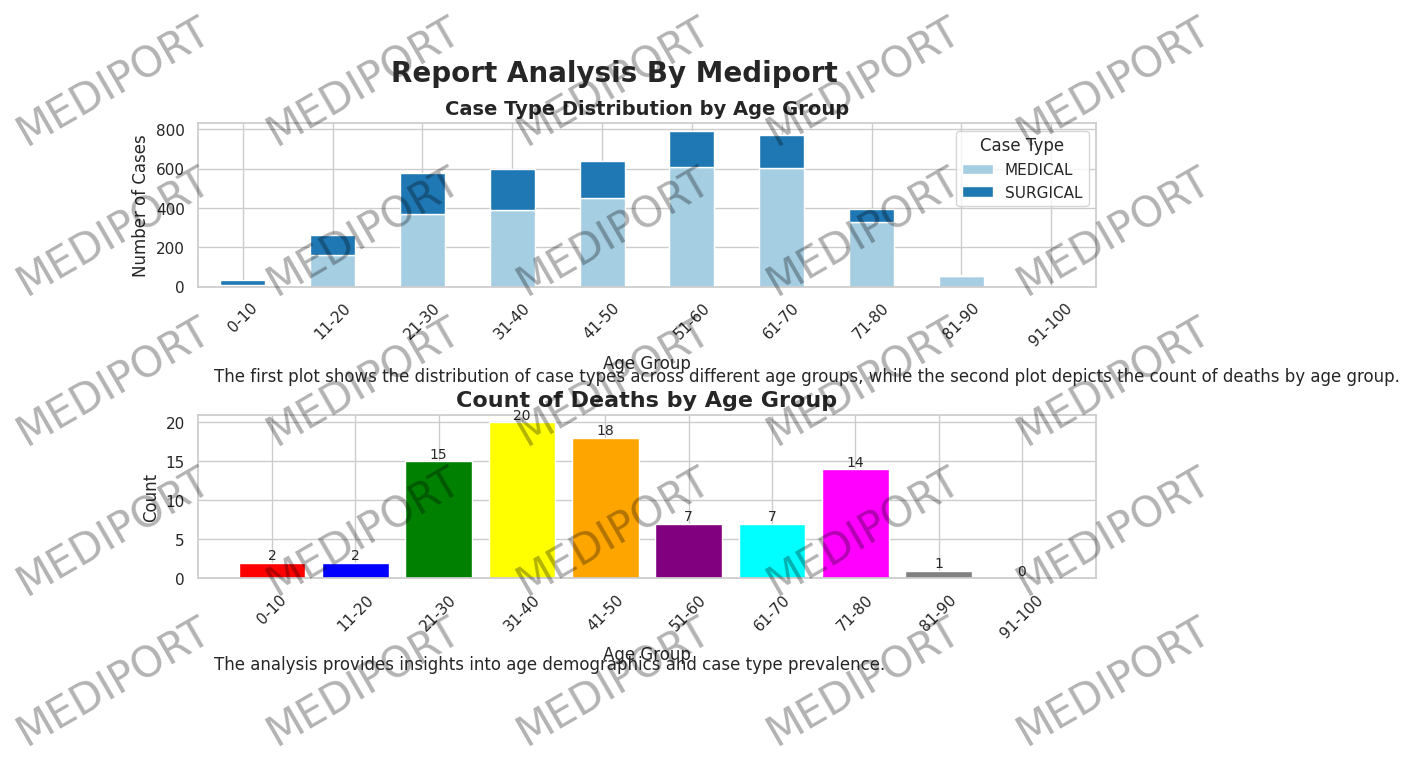

Combined plots saved as combined_death_case_distribution.png


In [ ]:
def plot_death_case_distribution(df):
    # Define bins for age groups
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

    # Categorize ages into age groups
    df['Age Group'] = pd.cut(df['Age(Years)'], bins=bins, labels=labels, right=False)

    # Filter the DataFrame for records with a death date
    death_df = df[df['Death Date'].notnull()]

    # Create a pivot table to count deaths by age group
    pivot_table = pd.pivot_table(death_df, index='Age Group', values='Case No', aggfunc='count')

    # Create a new figure to combine the plots
    plt.figure(figsize=(20, 12))

    # Plot 1: Stacked Bar Chart for Case Type Distribution by Age Group
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    if 'Case Type' in df.columns:
        # Create a pivot table for case type counts
        case_type_counts = pd.pivot_table(df, values='Case No', index='Age Group', columns='Case Type', aggfunc='count', fill_value=0)
        # Plot stacked bar chart
        case_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca(), color=plt.cm.Paired.colors)
        plt.title('Case Type Distribution by Age Group', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Cases')
        plt.xticks(rotation=45)

    # Plot 2: Count of Deaths by Age Group
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    specific_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'gray', 'brown']
    # Create bar plot for death counts
    bars = plt.bar(pivot_table.index, pivot_table['Case No'], color=specific_colors)

    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.title('Count of Deaths by Age Group', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)

    # Adding the count on top of each bar for better visibility
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    # Function to add diagonal watermark
    def add_diagonal_watermarks(fig, text, alpha=0.30, fontsize=30, rotation=30, spacing=0.25):
        for x in np.arange(0, 1 + spacing, spacing):
            for y in np.arange(0, 1 + spacing, spacing):
                fig.text(x, y, text, fontsize=fontsize, color='black',
                         ha='center', va='center', alpha=alpha, rotation=rotation)
    # Add diagonal watermarks across the entire page
    add_diagonal_watermarks(plt.gcf(), 'MEDIPORT', alpha=0.30, fontsize=30, rotation=30, spacing=0.25)



    # Add comments about the plots
    plt.figtext(0.5, 0.9999, 'Report Analysis By Mediport', ha='center', fontsize=20, fontweight='bold')
    plt.figtext(0.1, 0.50, 'The first plot shows the distribution of case types across different age groups, while the second plot depicts the count of deaths by age group.', ha='left', fontsize=12)
    plt.figtext(0.1, 0.02, 'The analysis provides insights into age demographics and case type prevalence.', ha='left', fontsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plots as an image
    combined_image_path = 'combined_death_case_distribution.png'
    plt.savefig(combined_image_path, bbox_inches='tight', pad_inches=0.5)
    plt.show()

    print(f'Combined plots saved as {combined_image_path}')
    return combined_image_path

# Example usage
combined_image_path = plot_death_case_distribution(df)

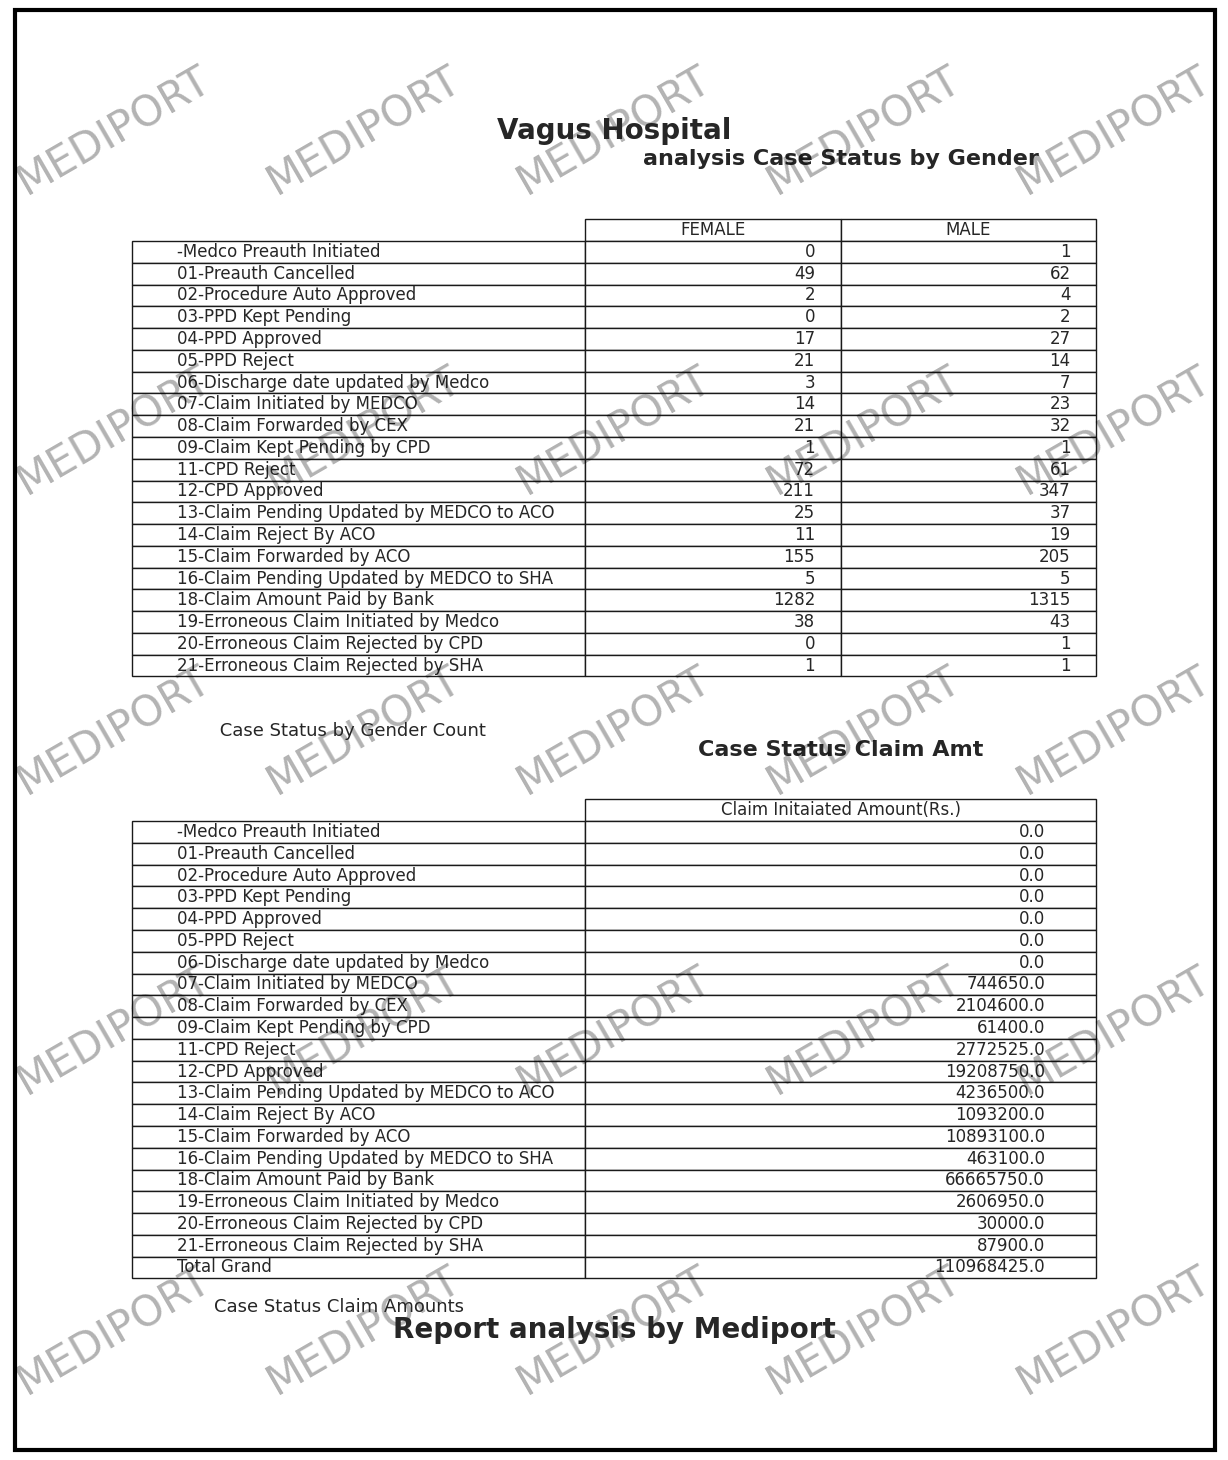

Combined pivot table saved as combined_counts_of_case_status_and_claim_amt.png


In [ ]:
def save_combined_pivot_tables_as_image(df, index_column, columns_column, values_column,
                                         output_image='combined_counts_of_case_status_and_claim_amt.png'):
    """
    Creates two pivot tables and saves them as a single image with comments and watermarks.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing case data.
    index_column (str): The column name to use as the index in the first pivot table.
    columns_column (str): The column name to use as the columns in the first pivot table.
    values_column (str): The column name to use for values in the first pivot table.
    output_image (str): The name of the image file to save. Default is 'combined_pivot_table.png'.
    """

    # Create the first pivot table
    pivot_table1 = pd.pivot_table(
        df,
        values=values_column,
        index=index_column,
        columns=columns_column,
        aggfunc='count',
        fill_value=0
    )

    # Create the second pivot table
    pivot_table2 = pd.pivot_table(
        df,
        values='Claim Initaiated Amount(Rs.)',
        index='Case Status',
        aggfunc='sum',
        margins=True,
        margins_name='Total Grand'
    )

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    # First subplot for the first pivot table
    axes[0].axis('off')
    axes[0].table(cellText=pivot_table1.values,
                  rowLabels=pivot_table1.index,
                  colLabels=pivot_table1.columns,
                  loc='center')
    axes[0].set_title( 'analysis Case Status by Gender', fontsize=16, fontweight='bold')

    # Second subplot for the second pivot table
    axes[1].axis('off')
    axes[1].table(cellText=pivot_table2.values,
                  rowLabels=pivot_table2.index,
                  colLabels=pivot_table2.columns,
                  loc='center')
    axes[1].set_title('Case Status Claim Amt', fontsize=16, fontweight='bold')

    # Function to add diagonal watermark
    def add_diagonal_watermarks(fig, text, alpha=0.30, fontsize=30, rotation=30, spacing=0.25):
        for x in np.arange(0, 1 + spacing, spacing):
            for y in np.arange(0, 1 + spacing, spacing):
                fig.text(x, y, text, fontsize=fontsize, color='black',
                        ha='center', va='center', alpha=alpha, rotation=rotation)
    # Add diagonal watermarks across the entire page
    add_diagonal_watermarks(plt.gcf(), 'MEDIPORT', alpha=0.30, fontsize=30, rotation=30, spacing=0.25)

    # Add comments under each plot
    fig.text(0.5, 0.99999, 'Vagus Hospital', ha='center', va='center', fontsize=20, fontweight='bold')
    fig.text(0.1, 0.5, ' Case Status by Gender Count', ha='left', va='center', fontsize=13)
    fig.text(0.1, 0.02, 'Case Status Claim Amounts', ha='left', va='center', fontsize=13)
    fig.text(0.5, 0.00099, 'Report analysis by Mediport', ha='center', va='center', fontsize=20, fontweight='bold')

    # Step 7: Add a border around the entire figure
    border = patches.Rectangle((-0.099, -0.099), 1.20, 1.20, transform=fig.transFigure, color='black', linewidth=3, fill=False)
    fig.patches.append(border)


    # Adjust layout and save the figure as an image
    plt.tight_layout()
    plt.savefig(output_image, bbox_inches='tight', pad_inches=0.5)
    plt.show()  # Close the plot to avoid displaying it

    print(f'Combined pivot table saved as {output_image}')
    return pivot_table1, pivot_table2

# Example usage:
combined_pivot_table1, combined_pivot_table2 = save_combined_pivot_tables_as_image(df, 'Case Status', 'Gender', 'Case No')